In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from importlib import reload
from noise_correlations import plot, utils

%matplotlib inline

## Load data

In [13]:
results_path = os.path.join(os.environ['HOME'], 'fits/neurocorr', 'exp1-2_pvc11_10_100_10000.npz')

In [14]:
with np.load(results_path) as results:
    p_s_lfi = results['p_s_lfi']
    p_s_sdkl = results['p_s_sdkl']
    p_r_lfi = results['p_r_lfi']
    p_r_sdkl = results['p_r_sdkl']
    v_lfi = results['v_lfi']
    v_sdkl = results['v_sdkl']

In [15]:
n_dims, n_dimlet_stim_combos = p_s_lfi.shape
dims = 2 + np.arange(n_dims)

## Behavior of metrics as dimensionality increases

In [16]:
lfi_mean = v_lfi.mean(axis=1)
lfi_std = v_lfi.std(axis=1)
sdkl_mean = v_sdkl.mean(axis=1)
sdkl_std = v_sdkl.std(axis=1)

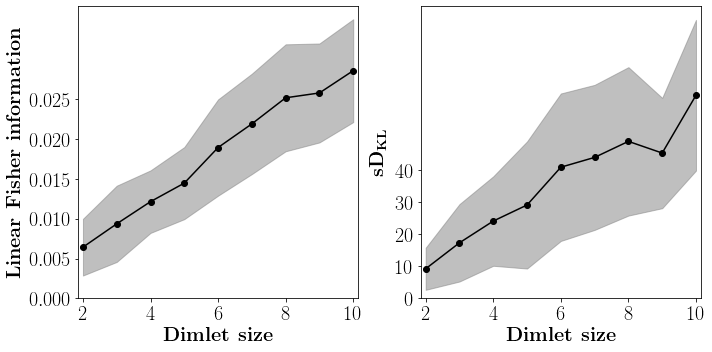

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(dims,
             lfi_mean,
             color='black',
             marker='o')
axes[0].fill_between(
    x=dims,
    y1=lfi_mean - 0.5 * lfi_std,
    y2=lfi_mean + 0.5 * lfi_std,
    color='gray',
    alpha=0.5)

axes[1].plot(dims,
             sdkl_mean,
             color='black',
             marker='o')
axes[1].fill_between(
    x=dims,
    y1=sdkl_mean - 0.5 * sdkl_std,
    y2=sdkl_mean + 0.5 * sdkl_std,
    color='gray',
    alpha=0.5)

for ax in axes:
    ax.set_xlabel(r'\textbf{Dimlet size}', fontsize=20)
    ax.set_xlim([1.85, 10.15])
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_ylim(bottom=0)
    
axes[0].set_yticks([0, 0.005, 0.01, 0.015, 0.02, 0.025])
axes[0].set_ylabel(r'\textbf{Linear Fisher information}', fontsize=20)
axes[1].set_yticks([0, 10, 20, 30, 40])
axes[1].set_ylabel(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=20)

plt.tight_layout()
plt.show()

## p-value distribution at different dimensionalities

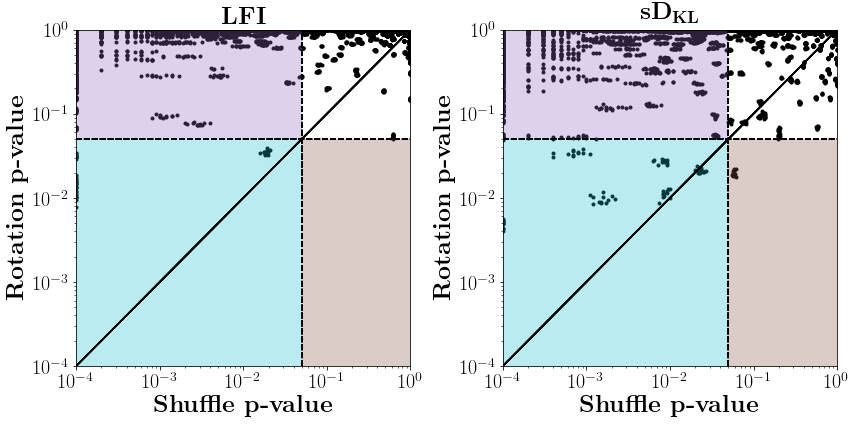

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for idx in range(n_dims):
    plot.plot_pvalue_comparison(
        p0s=p_s_lfi[idx],
        p1s=p_r_lfi[idx],
        labels=[r'\textbf{Shuffle p-value}', r'\textbf{Rotation p-value}'],
        show_inset=False,
        color_regions=idx == 0,
        fax=(fig, axes[0])
    )
    
for idx in range(n_dims):
    plot.plot_pvalue_comparison(
        p0s=p_s_sdkl[idx],
        p1s=p_r_sdkl[idx],
        labels=[r'\textbf{Shuffle p-value}', r'\textbf{Rotation p-value}'],
        show_inset=False,
        color_regions=idx == 0,
        fax=(fig, axes[1])
    )
    
axes[0].set_title(r'\textbf{LFI}', fontsize=25)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=25)
    
plt.tight_layout()

In [19]:
mean_s_lfi = np.mean(p_s_lfi, axis=1)
std_s_lfi = np.std(p_s_lfi, axis=1)
mean_r_lfi = np.mean(p_r_lfi, axis=1)
std_r_lfi = np.mean(p_r_lfi, axis=1)

mean_s_sdkl = np.mean(p_s_sdkl, axis=1)
std_s_sdkl = np.std(p_s_sdkl, axis=1)
mean_r_sdkl = np.mean(p_r_sdkl, axis=1)
std_r_sdkl = np.mean(p_r_sdkl, axis=1)

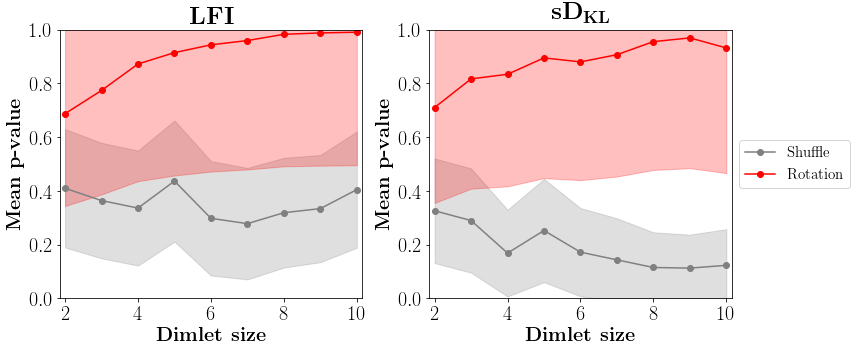

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(
    dims,
    mean_s_lfi,
    color='gray',
    marker='o')
axes[0].fill_between(
    x=dims,
    y1=mean_s_lfi - 0.5 * std_s_lfi,
    y2=mean_s_lfi + 0.5 * std_s_lfi,
    color='gray',
    alpha=0.25)

axes[0].plot(
    dims,
    mean_r_lfi,
    color='red',
    marker='o')
axes[0].fill_between(
    x=dims,
    y1=mean_r_lfi - 0.5 * std_r_lfi,
    y2=mean_r_lfi + 0.5 * std_r_lfi,
    color='red',
    alpha=0.25)

axes[1].plot(
    dims,
    mean_s_sdkl,
    color='gray',
    marker='o',
    label=r'Shuffle')
axes[1].fill_between(
    x=dims,
    y1=mean_s_sdkl - 0.5 * std_s_sdkl,
    y2=mean_s_sdkl + 0.5 * std_s_sdkl,
    color='gray',
    alpha=0.25)

axes[1].plot(
    dims,
    mean_r_sdkl,
    color='red',
    marker='o',
    label=r'Rotation')
axes[1].fill_between(
    x=dims,
    y1=mean_r_sdkl - 0.5 * std_r_sdkl,
    y2=mean_r_sdkl + 0.5 * std_r_sdkl,
    color='red',
    alpha=0.25)

lgd = axes[1].legend(loc='center left',
                     bbox_to_anchor=(1.0, 0.5),
                     prop={'size': 15})

for ax in axes:
    ax.set_xlabel(r'\textbf{Dimlet size}', fontsize=20)
    ax.set_xlim([1.85, 10.15])
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_ylim([0, 1])
    ax.set_ylabel(r'\textbf{Mean p-value}', fontsize=20)

axes[0].set_title(r'\textbf{LFI}', fontsize=25)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=25)

plt.tight_layout()
plt.show()

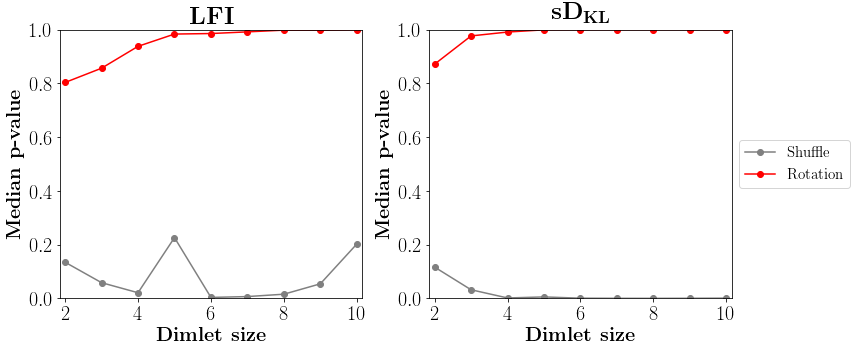

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(
    dims,
    np.median(p_s_lfi, axis=1),
    color='gray',
    marker='o')
axes[0].plot(
    dims,
    np.median(p_r_lfi, axis=1),
    color='red',
    marker='o')

axes[1].plot(
    dims,
    np.median(p_s_sdkl, axis=1),
    color='gray',
    marker='o',
    label=r'Shuffle')
axes[1].plot(
    dims,
    np.median(p_r_sdkl, axis=1),
    color='red',
    marker='o',
    label=r'Rotation')


lgd = axes[1].legend(loc='center left',
                     bbox_to_anchor=(1.0, 0.5),
                     prop={'size': 15})

for ax in axes:
    ax.set_xlabel(r'\textbf{Dimlet size}', fontsize=20)
    ax.set_xlim([1.85, 10.15])
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_ylim([0, 1])
    ax.set_ylabel(r'\textbf{Median p-value}', fontsize=20)

axes[0].set_title(r'\textbf{LFI}', fontsize=25)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=25)

plt.tight_layout()
plt.show()

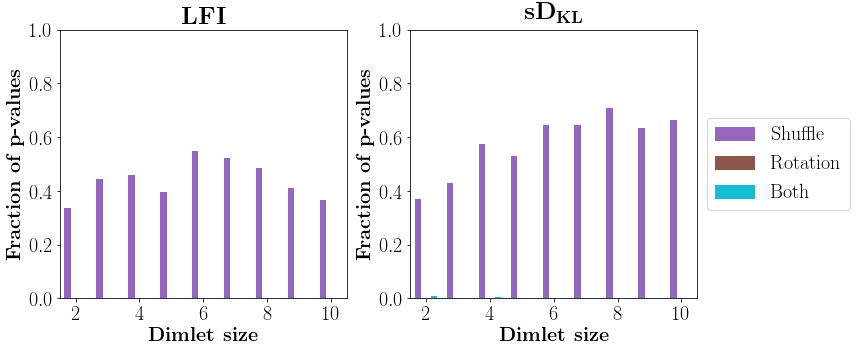

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, dim in enumerate(dims):
    regions = utils.p_value_regions(
        p_s_lfi[idx],
        p_r_lfi[idx],
        alpha=0.01
    )
    axes[0].bar(
        x=[dim - 0.25, dim, dim + 0.25],
        height=regions,
        width=0.20,
        color=[u'#9467bd', u'#8c564b', u'#17becf'])
    
    regions = utils.p_value_regions(
        p_s_sdkl[idx],
        p_r_sdkl[idx],
        alpha=0.01
    )
    axes[1].bar(
        x=[dim - 0.25, dim, dim + 0.25],
        height=regions,
        width=0.20,
        color=[u'#9467bd', u'#8c564b', u'#17becf'])
    
axes[1].bar(x=0, height=0, color='#9467bd', label='Shuffle')
axes[1].bar(x=0, height=0, color='#8c564b', label='Rotation')
axes[1].bar(x=0, height=0, color='#17becf', label='Both')
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
               prop={'size': 20})

for ax in axes:
    ax.set_xlabel(r'\textbf{Dimlet size}', fontsize=20)
    ax.set_xlim([1.50, 10.50])
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_ylim([0, 1])
    ax.set_ylabel(r'\textbf{Fraction of p-values}', fontsize=20)

axes[0].set_title(r'\textbf{LFI}', fontsize=25)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=25)

plt.tight_layout()
plt.show()

## Look at plots separated by stimulus

Text(0.5, 1.0, '\\textbf{sD}\\textsubscript{\\textbf{KL}}')

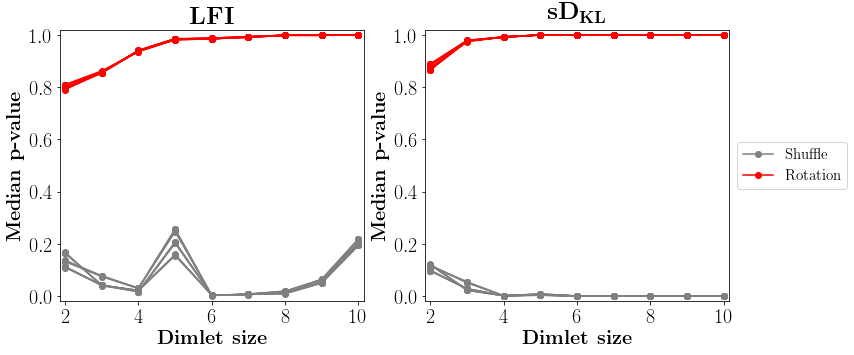

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx in range(12):
    idxs = idx + 12 * np.arange(100)
    
    axes[0].plot(
        dims,
        np.median(p_s_lfi[:, idxs], axis=1),
        color='gray',
        marker='o')
    axes[0].plot(
        dims,
        np.median(p_r_lfi[:, idxs], axis=1),
        color='red',
        marker='o')

    axes[1].plot(
        dims,
        np.median(p_s_sdkl[:, idxs], axis=1),
        color='gray',
        marker='o')
    axes[1].plot(
        dims,
        np.median(p_r_sdkl[:, idxs], axis=1),
        color='red',
        marker='o')

axes[1].plot(
    [], [],
    color='gray',
    marker='o',
    label=r'Shuffle')
axes[1].plot(
    [], [],
    color='red',
    marker='o',
    label=r'Rotation')
lgd = axes[1].legend(loc='center left',
                     bbox_to_anchor=(1.0, 0.5),
                     prop={'size': 15})


for ax in axes:
    ax.set_xlabel(r'\textbf{Dimlet size}', fontsize=20)
    ax.set_xlim([1.85, 10.15])
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_ylim([-0.02, 1.02])
    ax.set_ylabel(r'\textbf{Median p-value}', fontsize=20)

axes[0].set_title(r'\textbf{LFI}', fontsize=25)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=25)